In this chapter, we will explore how to reshape and enrich data using pandas. Data reshaping and enriching are essential steps in data preprocessing because they help transform raw data into a more structured, useful, and meaningful format that can be effectively used for analysis or modeling.

In [28]:
#| echo: false

from IPython.display import Image, display, HTML

# Create HTML layout for side-by-side images
html_content = """
<div style="display: flex; gap: 20px;">
    <img src="https://ucarecdn.com/fe16e27c-a341-4551-9b84-e0e56bb2d329/-/stretch/off/-/resize/1100x/-/format/webp/" width="400" />
    <img src="https://pandas.pydata.org/docs/_images/merging_join_multi_df.png" width="500" />
</div>
"""

# Display the images side by side
display(HTML(html_content))

## Data Reshaping

Data reshaping involves altering the structure of the data to suit the requirements of the analysis or modeling process. This is often needed when the data is in a format that is difficult to analyze or when it needs to be organized in a specific way.

### Why Data Reshaping is Important:

* **Improves Data Organization**: Raw data may be in a long format, where each observation is recorded on a separate row, or it may be in a wide format, where the same variable is spread across multiple columns. Reshaping allows you to reorganize the data into a format that is more suitable for analysis, such as turning multiple columns into a single column (melting) or aggregating rows into summary statistics (pivoting).

* **Facilitates Analysis**: Some analysis techniques require specific data formats. For example, many machine learning algorithms require data in a matrix form, where each row represents a sample and each column represents a feature. Reshaping helps to convert data into this format.

* **Simplifies Visualization**: Visualizing data is easier when it is in the right shape. For instance, plotting categorical data across time is easier when the data is in a tidy format, rather than having multiple variables spread across columns.

* **Efficient Grouping and Aggregation**: In some cases, you may want to group data by certain categories or time periods, and reshaping can help aggregate data effectively for summarization.

### Wide vs. Long Data Format in Data Reshaping

* **Wide Format**: Each variable in its own column; each row represents a unit, and data for multiple variables is spread across columns.
* **Long Format**: Variables are stacked into one column per variable, with additional columns used to indicate time, categories, or other distinctions, leading to a greater number of rows.


To reshape between these two formats, you can use pandas functions such as `pivot_table()`, `melt()`, `stack()`, and `unstack()`. Let’s next take a look at each of these methods one by one.

Throughout this section, we will continue using the *gdp_lifeExpectancy.csv* dataset. 
Let's start by reading the CSV file into a pandas DataFrame.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Load the data
gdp_lifeExp_data = pd.read_csv('./Datasets/gdp_lifeExpectancy.csv')
gdp_lifeExp_data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


### Pivoting "long" to "wide" using `pivot_table()`

In the last chapter, we learned that `pivot_table()` is a powerful tool for performing groupwise aggregation in a structured format. The `pivot_table()` function is used to reshape data by specifying columns for the index, columns, and values.

#### Pivoting a single column

Consider the life expectancy dataset. Let’s calculate the average life expectancy for each combination of country and year.

In [4]:
gdp_lifeExp_data_pivot = gdp_lifeExp_data.pivot_table(index=['continent','country'], columns='year', values='lifeExp', aggfunc='mean')
gdp_lifeExp_data_pivot.head()

year                      1952    1957    1962    1967    1972    1977  \
continent country                                                        
Africa    Algeria       43.077  45.685  48.303  51.407  54.518  58.014   
          Angola        30.015  31.999  34.000  35.985  37.928  39.483   
          Benin         38.223  40.358  42.618  44.885  47.014  49.190   
          Botswana      47.622  49.618  51.520  53.298  56.024  59.319   
          Burkina Faso  31.975  34.906  37.814  40.697  43.591  46.137   

year                      1982    1987    1992    1997    2002    2007  
continent country                                                       
Africa    Algeria       61.368  65.799  67.744  69.152  70.994  72.301  
          Angola        39.942  39.906  40.647  40.963  41.003  42.731  
          Benin         50.904  52.337  53.919  54.777  54.406  56.728  
          Botswana      61.484  63.622  62.745  52.556  46.634  50.728  
          Burkina Faso  48.122  49.557  50.260  50.324  50.650  52.295

**Explanation**

- **values**: Specifies the column to aggregate (e.g., `lifeExp` in our example).
- **index**: Groups by the rows based on the `continent` and `country` column.
- **columns**: Groups by the columns based on the `year` column.
- **aggfunc**: Uses `mean` to calculate the average life expectancy.

With values of `year` as columns, it is easy to compare any metric for different years.

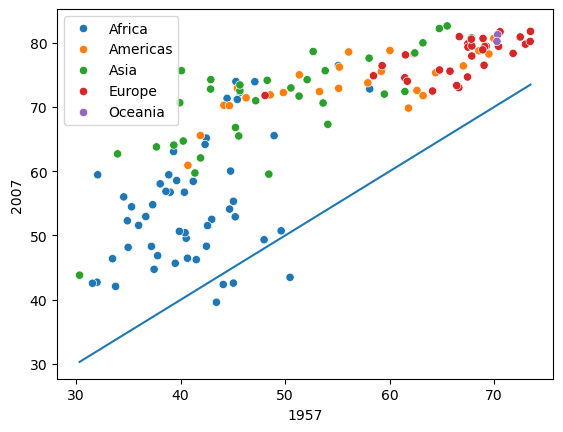

In [5]:
#visualizing the change in life expectancy of all countries in 2007 as compared to that in 1957, i.e., the overall change in life expectancy in 50 years. 
sns.scatterplot(data = gdp_lifeExp_data_pivot, x = 1957,y=2007,hue = 'continent')
sns.lineplot(data = gdp_lifeExp_data_pivot, x = 1957,y = 1957);

Observe that for some African countries, the life expectancy has decreased after 50 years. It is worth investigating these countries to identify factors associated with the decrease.

Another way to visualize a pivot table is by using a heatmap, which represents the 2D table as a matrix of colors, making it easier to interpret patterns and trends.

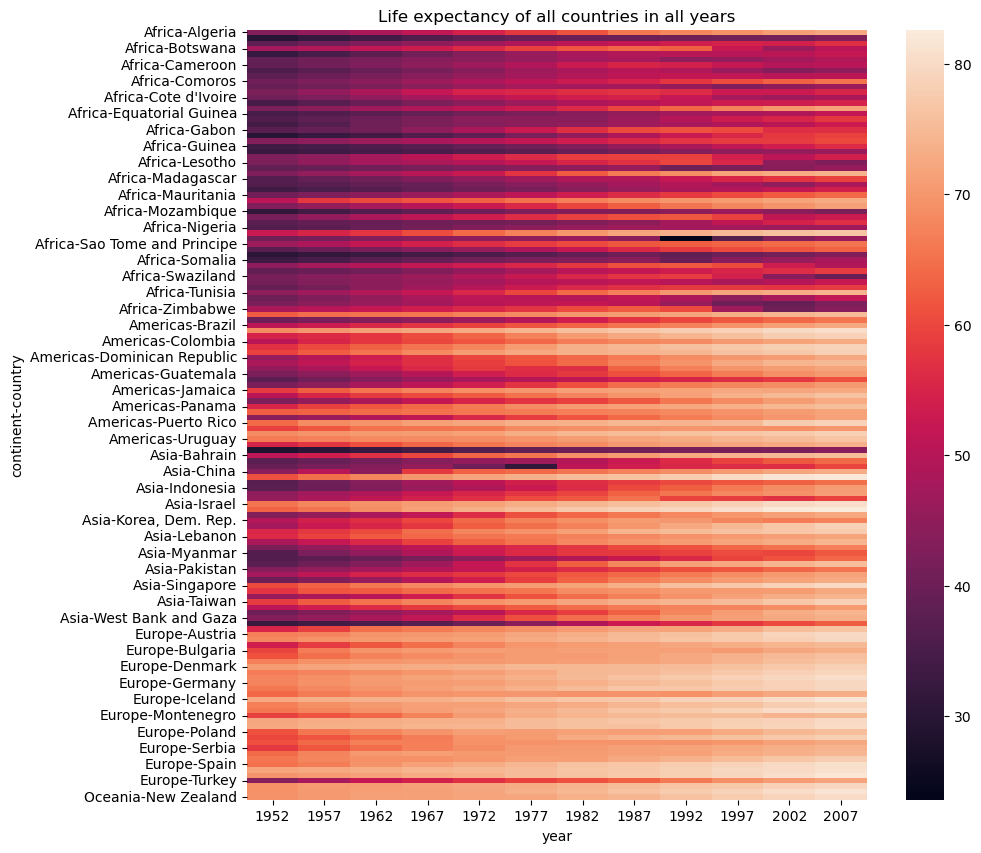

In [27]:
# Plotting a heatmap to visualize the life expectancy of all countries in all years, figure size is set to 15x10
plt.figure(figsize=(10,10))
plt.title("Life expectancy of all countries in all years")
sns.heatmap(gdp_lifeExp_data_pivot);

**Common Aggregation Functions in `pivot_table()`**

You can use various aggregation functions within `pivot_table()` to summarize data:

- **`mean`** – Calculates the average of values within each group.
- **`sum`** – Computes the total of values within each group.
- **`count`** – Counts the number of non-null entries within each group.
- **`min`** and **`max`** – Finds the minimum and maximum values within each group.

We can also define our own custom aggregation function and pass it to the `aggfunc` parameter of the `pivot_table()` function

**For Example:** Find the $90^{th}$ percentile of life expectancy for each country and year combination

In [7]:
pd.pivot_table(data = gdp_lifeExp_data, values = 'lifeExp',index = 'country', columns ='year',aggfunc = lambda x:np.percentile(x,90))

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Afghanistan,28.801,30.332,31.997,34.020,36.088,38.438,39.854,40.822,41.674,41.763,42.129,43.828
Albania,55.230,59.280,64.820,66.220,67.690,68.930,70.420,72.000,71.581,72.950,75.651,76.423
Algeria,43.077,45.685,48.303,51.407,54.518,58.014,61.368,65.799,67.744,69.152,70.994,72.301
Angola,30.015,31.999,34.000,35.985,37.928,39.483,39.942,39.906,40.647,40.963,41.003,42.731
Argentina,62.485,64.399,65.142,65.634,67.065,68.481,69.942,70.774,71.868,73.275,74.340,75.320
...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,40.412,42.887,45.363,47.838,50.254,55.764,58.816,62.820,67.662,70.672,73.017,74.249
West Bank and Gaza,43.160,45.671,48.127,51.631,56.532,60.765,64.406,67.046,69.718,71.096,72.370,73.422
"Yemen, Rep.",32.548,33.970,35.180,36.984,39.848,44.175,49.113,52.922,55.599,58.020,60.308,62.698


### Melting "wide" to "long" using `melt()`

Melting is the **inverse** of pivoting. It transforms columns into rows. The `melt()` function is used when you want to unpivot a DataFrame, turning multiple columns into rows.

Let's first consider *gdp_lifeExp_data_pivot* created in the previous section

In [8]:
gdp_lifeExp_data_pivot.head()

year                      1952    1957    1962    1967    1972    1977  \
continent country                                                        
Africa    Algeria       43.077  45.685  48.303  51.407  54.518  58.014   
          Angola        30.015  31.999  34.000  35.985  37.928  39.483   
          Benin         38.223  40.358  42.618  44.885  47.014  49.190   
          Botswana      47.622  49.618  51.520  53.298  56.024  59.319   
          Burkina Faso  31.975  34.906  37.814  40.697  43.591  46.137   

year                      1982    1987    1992    1997    2002    2007  
continent country                                                       
Africa    Algeria       61.368  65.799  67.744  69.152  70.994  72.301  
          Angola        39.942  39.906  40.647  40.963  41.003  42.731  
          Benin         50.904  52.337  53.919  54.777  54.406  56.728  
          Botswana      61.484  63.622  62.745  52.556  46.634  50.728  
          Burkina Faso  48.122  49.557  50.260  50.324  50.650  52.295

In [9]:
gdp_lifeExp_data_pivot.melt(value_name='lifeExp', var_name='year', ignore_index=False)

year  lifeExp
continent country                      
Africa    Algeria         1952   43.077
          Angola          1952   30.015
          Benin           1952   38.223
          Botswana        1952   47.622
          Burkina Faso    1952   31.975
...                        ...      ...
Europe    Switzerland     2007   81.701
          Turkey          2007   71.777
          United Kingdom  2007   79.425
Oceania   Australia       2007   81.235
          New Zealand     2007   80.204

[1704 rows x 2 columns]

With the above DataFrame, we can visualize the mean life expectancy against year separately for each country in each continent.

### Stacking and Unstacking using `stack()` and `unstack()`

Stacking and unstacking are powerful techniques used to reshape DataFrames by moving data between rows and columns. These operations are particularly useful when working with **multi-level index** or **multi-level columns**, where the data is structured in a hierarchical format.

* `stack()`: Converts columns into rows, which means it "stacks" the data into a long format.
* `unstack()`: Converts rows into columns, reversing the effect of `stack()`.

Let’s use the GDP per capita dataset and create a DataFrame with a multi-level index (e.g., continent, country) and multi-level columns (e.g., lifeExp , gdpPercap, and pop).

In [ ]:
# calculate the average and standard deviation of life expectancy, population, and GDP per capita for countries across the years.

gdp_lifeExp_multilevel_data = gdp_lifeExp_data.groupby(['continent', 'country'])[['lifeExp', 'pop', 'gdpPercap']].agg(['mean', 'std'])
gdp_lifeExp_multilevel_data

lifeExp                      pop                \
                               mean        std          mean           std   
continent country                                                            
Africa    Algeria         59.030167  10.340069  1.987541e+07  8.613355e+06   
          Angola          37.883500   4.005276  7.309390e+06  2.672281e+06   
          Benin           48.779917   6.128681  4.017497e+06  2.105002e+06   
          Botswana        54.597500   5.929476  9.711862e+05  4.710965e+05   
          Burkina Faso    44.694000   6.845792  7.548677e+06  3.247808e+06   
...                             ...        ...           ...           ...   
Europe    Switzerland     75.565083   4.011572  6.384293e+06  8.582009e+05   
          Turkey          59.696417   9.030591  4.590901e+07  1.667768e+07   
          United Kingdom  73.922583   3.378943  5.608780e+07  3.174339e+06   
Oceania   Australia       74.662917   4.147774  1.464931e+07  3.915203e+06   
          New Zealand     73.989500   3.559724  3.100032e+06  6.547108e+05   

                             gdpPercap               
                                  mean          std  
continent country                                    
Africa    Algeria          4426.025973  1310.337656  
          Angola           3607.100529  1165.900251  
          Benin            1155.395107   159.741306  
          Botswana         5031.503557  4178.136987  
          Burkina Faso      843.990665   183.430087  
...                                ...          ...  
Europe    Switzerland     27074.334405  6886.463308  
          Turkey           4469.453380  2049.665102  
          United Kingdom  19380.472986  7388.189399  
Oceania   Australia       19980.595634  7815.405220  
          New Zealand     17262.622813  4409.009167  

[142 rows x 6 columns]

The resulting DataFrame has two levels of index and two levels of columns, as shown below:

In [ ]:
# check the level of row and column index
gdp_lifeExp_multilevel_data.index.nlevels

2

In [ ]:
gdp_lifeExp_multilevel_data.columns.nlevels

2

if you want to see the data along with the index and columns (in a more accessible way), you can directly print the `.index` and `.columns` attributes.

In [ ]:
gdp_lifeExp_multilevel_data.index

MultiIndex([( 'Africa',                  'Algeria'),
            ( 'Africa',                   'Angola'),
            ( 'Africa',                    'Benin'),
            ( 'Africa',                 'Botswana'),
            ( 'Africa',             'Burkina Faso'),
            ( 'Africa',                  'Burundi'),
            ( 'Africa',                 'Cameroon'),
            ( 'Africa', 'Central African Republic'),
            ( 'Africa',                     'Chad'),
            ( 'Africa',                  'Comoros'),
            ...
            ( 'Europe',                   'Serbia'),
            ( 'Europe',          'Slovak Republic'),
            ( 'Europe',                 'Slovenia'),
            ( 'Europe',                    'Spain'),
            ( 'Europe',                   'Sweden'),
            ( 'Europe',              'Switzerland'),
            ( 'Europe',                   'Turkey'),
            ( 'Europe',           'United Kingdom'),
            ('Oceania',       

In [ ]:
gdp_lifeExp_multilevel_data.columns

MultiIndex([(  'lifeExp', 'mean'),
            (  'lifeExp',  'std'),
            (      'pop', 'mean'),
            (      'pop',  'std'),
            ('gdpPercap', 'mean'),
            ('gdpPercap',  'std')],
           )

As seen, **the index and columns each contain tuples**. This is the reason that when performing data subsetting on a DataFrame with multi-level index and columns, you need to supply a tuple to specify the exact location of the data.

In [ ]:
gdp_lifeExp_multilevel_data.loc[('Americas', 'United States'), ('lifeExp', 'mean')]

73.4785

In [ ]:
gdp_lifeExp_multilevel_data.columns.values

array([('lifeExp', 'mean'), ('lifeExp', 'std'), ('pop', 'mean'),
       ('pop', 'std'), ('gdpPercap', 'mean'), ('gdpPercap', 'std')],
      dtype=object)

#### Understanding the `level` in multi-level index and columns

The `gdp_lifeExp_multilevel_data` dataframe have two levels of index and two level of columns, You can reference these levels in various operations, such as grouping, subsetting, or performing aggregations. The `level` parameter helps identify which part of the multi-level structure you're working with.

In [ ]:
gdp_lifeExp_multilevel_data.index.get_level_values(0)

Index(['Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa',
       'Africa', 'Africa', 'Africa',
       ...
       'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe',
       'Europe', 'Oceania', 'Oceania'],
      dtype='object', name='continent', length=142)

In [ ]:
gdp_lifeExp_multilevel_data.index.get_level_values(1)

In [ ]:
gdp_lifeExp_multilevel_data.columns.get_level_values(0)

Index(['lifeExp', 'lifeExp', 'pop', 'pop', 'gdpPercap', 'gdpPercap'], dtype='object')

In [ ]:
gdp_lifeExp_multilevel_data.columns.get_level_values(1)

Index(['mean', 'std', 'mean', 'std', 'mean', 'std'], dtype='object')

In [ ]:
gdp_lifeExp_multilevel_data.columns.get_level_values(-1)

Index(['mean', 'std', 'mean', 'std', 'mean', 'std'], dtype='object')

As seen above, the outermost level corresponds to `level=0`, and it increases as we move inward to the inner levels. The innermost level can be referred to as `-1`.

Now, let's use the level number in the `droplevel()` method to see how it works. The syntax for this method is as follows:

`DataFrame.droplevel(level, axis=0)`

In [ ]:
# drop the first level of row index
gdp_lifeExp_multilevel_data.droplevel(0, axis=0)

lifeExp                      pop                \
                     mean        std          mean           std   
country                                                            
Algeria         59.030167  10.340069  1.987541e+07  8.613355e+06   
Angola          37.883500   4.005276  7.309390e+06  2.672281e+06   
Benin           48.779917   6.128681  4.017497e+06  2.105002e+06   
Botswana        54.597500   5.929476  9.711862e+05  4.710965e+05   
Burkina Faso    44.694000   6.845792  7.548677e+06  3.247808e+06   
...                   ...        ...           ...           ...   
Switzerland     75.565083   4.011572  6.384293e+06  8.582009e+05   
Turkey          59.696417   9.030591  4.590901e+07  1.667768e+07   
United Kingdom  73.922583   3.378943  5.608780e+07  3.174339e+06   
Australia       74.662917   4.147774  1.464931e+07  3.915203e+06   
New Zealand     73.989500   3.559724  3.100032e+06  6.547108e+05   

                   gdpPercap               
                        mean          std  
country                                    
Algeria          4426.025973  1310.337656  
Angola           3607.100529  1165.900251  
Benin            1155.395107   159.741306  
Botswana         5031.503557  4178.136987  
Burkina Faso      843.990665   183.430087  
...                      ...          ...  
Switzerland     27074.334405  6886.463308  
Turkey           4469.453380  2049.665102  
United Kingdom  19380.472986  7388.189399  
Australia       19980.595634  7815.405220  
New Zealand     17262.622813  4409.009167  

[142 rows x 6 columns]

In [ ]:
# drop the first level of column index
gdp_lifeExp_multilevel_data.droplevel(0, axis=1)

mean        std          mean           std  \
continent country                                                            
Africa    Algeria         59.030167  10.340069  1.987541e+07  8.613355e+06   
          Angola          37.883500   4.005276  7.309390e+06  2.672281e+06   
          Benin           48.779917   6.128681  4.017497e+06  2.105002e+06   
          Botswana        54.597500   5.929476  9.711862e+05  4.710965e+05   
          Burkina Faso    44.694000   6.845792  7.548677e+06  3.247808e+06   
...                             ...        ...           ...           ...   
Europe    Switzerland     75.565083   4.011572  6.384293e+06  8.582009e+05   
          Turkey          59.696417   9.030591  4.590901e+07  1.667768e+07   
          United Kingdom  73.922583   3.378943  5.608780e+07  3.174339e+06   
Oceania   Australia       74.662917   4.147774  1.464931e+07  3.915203e+06   
          New Zealand     73.989500   3.559724  3.100032e+06  6.547108e+05   

                                  mean          std  
continent country                                    
Africa    Algeria          4426.025973  1310.337656  
          Angola           3607.100529  1165.900251  
          Benin            1155.395107   159.741306  
          Botswana         5031.503557  4178.136987  
          Burkina Faso      843.990665   183.430087  
...                                ...          ...  
Europe    Switzerland     27074.334405  6886.463308  
          Turkey           4469.453380  2049.665102  
          United Kingdom  19380.472986  7388.189399  
Oceania   Australia       19980.595634  7815.405220  
          New Zealand     17262.622813  4409.009167  

[142 rows x 6 columns]

#### Stacking (Columns to Rows ): `stack()`

The `stack()` function pivots the columns into rows. You can specify which level you want to stack using the `level` parameter. By default, it will stack the innermost level of the columns.

In [ ]:
gdp_lifeExp_multilevel_data.stack(future_stack=True)

lifeExp           pop     gdpPercap
continent country                                                   
Africa    Algeria        mean  59.030167  1.987541e+07   4426.025973
                         std   10.340069  8.613355e+06   1310.337656
          Angola         mean  37.883500  7.309390e+06   3607.100529
                         std    4.005276  2.672281e+06   1165.900251
          Benin          mean  48.779917  4.017497e+06   1155.395107
...                                  ...           ...           ...
Europe    United Kingdom std    3.378943  3.174339e+06   7388.189399
Oceania   Australia      mean  74.662917  1.464931e+07  19980.595634
                         std    4.147774  3.915203e+06   7815.405220
          New Zealand    mean  73.989500  3.100032e+06  17262.622813
                         std    3.559724  6.547108e+05   4409.009167

[284 rows x 3 columns]

Let's change the default setting by specifying the `level=0`(the outmost level)

In [ ]:
gdp_lifeExp_multilevel_data.stack(level=0, future_stack=True)

mean           std
continent country                                          
Africa    Algeria     lifeExp    5.903017e+01  1.034007e+01
                      pop        1.987541e+07  8.613355e+06
                      gdpPercap  4.426026e+03  1.310338e+03
          Angola      lifeExp    3.788350e+01  4.005276e+00
                      pop        7.309390e+06  2.672281e+06
...                                       ...           ...
Oceania   Australia   pop        1.464931e+07  3.915203e+06
                      gdpPercap  1.998060e+04  7.815405e+03
          New Zealand lifeExp    7.398950e+01  3.559724e+00
                      pop        3.100032e+06  6.547108e+05
                      gdpPercap  1.726262e+04  4.409009e+03

[426 rows x 2 columns]

#### Unstacking (Rows to Columns) : `unstack()`

The `unstack()` function pivots the rows back into columns. By default, it will unstack the innermost level of the index.

Let's reverse the prevous dataframe to its original shape using `unstack()`.

In [ ]:
gdp_lifeExp_multilevel_data.stack(level=0, future_stack=True).unstack()

mean                                    std  \
                            lifeExp           pop     gdpPercap    lifeExp   
continent country                                                            
Africa    Algeria         59.030167  1.987541e+07   4426.025973  10.340069   
          Angola          37.883500  7.309390e+06   3607.100529   4.005276   
          Benin           48.779917  4.017497e+06   1155.395107   6.128681   
          Botswana        54.597500  9.711862e+05   5031.503557   5.929476   
          Burkina Faso    44.694000  7.548677e+06    843.990665   6.845792   
...                             ...           ...           ...        ...   
Europe    Switzerland     75.565083  6.384293e+06  27074.334405   4.011572   
          Turkey          59.696417  4.590901e+07   4469.453380   9.030591   
          United Kingdom  73.922583  5.608780e+07  19380.472986   3.378943   
Oceania   Australia       74.662917  1.464931e+07  19980.595634   4.147774   
          New Zealand     73.989500  3.100032e+06  17262.622813   3.559724   

                                                     
                                   pop    gdpPercap  
continent country                                    
Africa    Algeria         8.613355e+06  1310.337656  
          Angola          2.672281e+06  1165.900251  
          Benin           2.105002e+06   159.741306  
          Botswana        4.710965e+05  4178.136987  
          Burkina Faso    3.247808e+06   183.430087  
...                                ...          ...  
Europe    Switzerland     8.582009e+05  6886.463308  
          Turkey          1.667768e+07  2049.665102  
          United Kingdom  3.174339e+06  7388.189399  
Oceania   Australia       3.915203e+06  7815.405220  
          New Zealand     6.547108e+05  4409.009167  

[142 rows x 6 columns]

### Transposing using  `.T` attribute

If you simply want to swap rows and columns, you can use the `.T` attribute.

In [ ]:
gdp_lifeExp_multilevel_data.T

continent             Africa                                             \
country              Algeria        Angola         Benin       Botswana   
lifeExp   mean  5.903017e+01  3.788350e+01  4.877992e+01      54.597500   
          std   1.034007e+01  4.005276e+00  6.128681e+00       5.929476   
pop       mean  1.987541e+07  7.309390e+06  4.017497e+06  971186.166667   
          std   8.613355e+06  2.672281e+06  2.105002e+06  471096.527435   
gdpPercap mean  4.426026e+03  3.607101e+03  1.155395e+03    5031.503557   
          std   1.310338e+03  1.165900e+03  1.597413e+02    4178.136987   

continent                                                 \
country         Burkina Faso       Burundi      Cameroon   
lifeExp   mean  4.469400e+01  4.481733e+01  4.812850e+01   
          std   6.845792e+00  3.174882e+00  5.467960e+00   
pop       mean  7.548677e+06  4.651608e+06  9.816648e+06   
          std   3.247808e+06  1.874538e+06  4.363640e+06   
gdpPercap mean  8.439907e+02  4.716630e+02  1.774634e+03   
          std   1.834301e+02  9.932972e+01  4.195899e+02   

continent                                                             ...  \
country        Central African Republic          Chad        Comoros  ...   
lifeExp   mean             4.386692e+01  4.677358e+01      52.381750  ...   
          std              4.720690e+00  4.887978e+00       8.132353  ...   
pop       mean             2.560963e+06  5.329256e+06  361683.916667  ...   
          std              1.072158e+06  2.464304e+06  182998.737990  ...   
gdpPercap mean             9.587847e+02  1.165454e+03    1314.380339  ...   
          std              1.919529e+02  2.305481e+02     298.334389  ...   

continent             Europe                                              \
country               Serbia Slovak Republic      Slovenia         Spain   
lifeExp   mean  6.855100e+01    7.069608e+01  7.160075e+01  7.420342e+01   
          std   4.906736e+00    2.715787e+00  3.677979e+00  5.155859e+00   
pop       mean  8.783887e+06    4.774507e+06  1.794381e+06  3.585180e+07   
          std   1.192153e+06    6.425096e+05  2.022077e+05  4.323928e+06   
gdpPercap mean  9.305049e+03    1.041553e+04  1.407458e+04  1.402983e+04   
          std   3.829907e+03    3.650231e+03  6.470288e+03  8.046635e+03   

continent                                                                \
country               Sweden   Switzerland        Turkey United Kingdom   
lifeExp   mean  7.617700e+01  7.556508e+01  5.969642e+01   7.392258e+01   
          std   3.003990e+00  4.011572e+00  9.030591e+00   3.378943e+00   
pop       mean  8.220029e+06  6.384293e+06  4.590901e+07   5.608780e+07   
          std   6.365660e+05  8.582009e+05  1.667768e+07   3.174339e+06   
gdpPercap mean  1.994313e+04  2.707433e+04  4.469453e+03   1.938047e+04   
          std   7.723248e+03  6.886463e+03  2.049665e+03   7.388189e+03   

continent            Oceania                
country            Australia   New Zealand  
lifeExp   mean  7.466292e+01  7.398950e+01  
          std   4.147774e+00  3.559724e+00  
pop       mean  1.464931e+07  3.100032e+06  
          std   3.915203e+06  6.547108e+05  
gdpPercap mean  1.998060e+04  1.726262e+04  
          std   7.815405e+03  4.409009e+03  

[6 rows x 142 columns]

### Summary of Common Reshaping Functions

| Function      | Description                                               | Example                            |
|---------------|-----------------------------------------------------------|------------------------------------|
| `pivot()`     | Reshape data by creating new columns from existing ones.  | Pivot data on index/columns.      |
| `melt()`      | Unpivot data, turning columns into rows.                  | Convert wide format to long.      |
| `stack()`     | Convert columns to rows.                                  | Move column data to rows.         |
| `unstack()`   | Convert rows back to columns.                             | Move row data to columns.         |
| `.T`          | Transpose the DataFrame (swap rows and columns).          | Transpose the entire DataFrame.   |

 **Practical Use Cases:**

- **Pivoting:** Useful for time series analysis or when you want to group and summarize data by specific categories.
- **Melting:** Helpful when you need to reshape wide data for easier analysis or when preparing data for machine learning algorithms.
- **Stacking/Unstacking:** Useful when you are working with hierarchical index DataFrames.
- **Transpose:** Helpful for reorienting data for analysis or visualization.

### Converting from Multi-Level Index to Single-Level Index DataFrame

If you're uncomfortable working with DataFrames that have multi-level indexes and columns, you can convert them into single-level DataFrames using the methods you learned in the previous chapter:

* `reset_index()`
* Flattening the multi-level columns

In [ ]:
# reset the index to convert the multi-level index to a single-level index
gdp_lifeExp_multilevel_data.reset_index()

continent         country    lifeExp                      pop  \
                                    mean        std          mean   
0      Africa         Algeria  59.030167  10.340069  1.987541e+07   
1      Africa          Angola  37.883500   4.005276  7.309390e+06   
2      Africa           Benin  48.779917   6.128681  4.017497e+06   
3      Africa        Botswana  54.597500   5.929476  9.711862e+05   
4      Africa    Burkina Faso  44.694000   6.845792  7.548677e+06   
..        ...             ...        ...        ...           ...   
137    Europe     Switzerland  75.565083   4.011572  6.384293e+06   
138    Europe          Turkey  59.696417   9.030591  4.590901e+07   
139    Europe  United Kingdom  73.922583   3.378943  5.608780e+07   
140   Oceania       Australia  74.662917   4.147774  1.464931e+07   
141   Oceania     New Zealand  73.989500   3.559724  3.100032e+06   

                      gdpPercap               
              std          mean          std  
0    8.613355e+06   4426.025973  1310.337656  
1    2.672281e+06   3607.100529  1165.900251  
2    2.105002e+06   1155.395107   159.741306  
3    4.710965e+05   5031.503557  4178.136987  
4    3.247808e+06    843.990665   183.430087  
..            ...           ...          ...  
137  8.582009e+05  27074.334405  6886.463308  
138  1.667768e+07   4469.453380  2049.665102  
139  3.174339e+06  19380.472986  7388.189399  
140  3.915203e+06  19980.595634  7815.405220  
141  6.547108e+05  17262.622813  4409.009167  

[142 rows x 8 columns]

In [ ]:
# flatten the multi-level column
gdp_lifeExp_multilevel_data.columns = ['_'.join(col).strip() for col in gdp_lifeExp_multilevel_data.columns.values]
gdp_lifeExp_multilevel_data

lifeExp_mean  lifeExp_std      pop_mean  \
continent country                                                   
Africa    Algeria            59.030167    10.340069  1.987541e+07   
          Angola             37.883500     4.005276  7.309390e+06   
          Benin              48.779917     6.128681  4.017497e+06   
          Botswana           54.597500     5.929476  9.711862e+05   
          Burkina Faso       44.694000     6.845792  7.548677e+06   
...                                ...          ...           ...   
Europe    Switzerland        75.565083     4.011572  6.384293e+06   
          Turkey             59.696417     9.030591  4.590901e+07   
          United Kingdom     73.922583     3.378943  5.608780e+07   
Oceania   Australia          74.662917     4.147774  1.464931e+07   
          New Zealand        73.989500     3.559724  3.100032e+06   

                               pop_std  gdpPercap_mean  gdpPercap_std  
continent country                                                      
Africa    Algeria         8.613355e+06     4426.025973    1310.337656  
          Angola          2.672281e+06     3607.100529    1165.900251  
          Benin           2.105002e+06     1155.395107     159.741306  
          Botswana        4.710965e+05     5031.503557    4178.136987  
          Burkina Faso    3.247808e+06      843.990665     183.430087  
...                                ...             ...            ...  
Europe    Switzerland     8.582009e+05    27074.334405    6886.463308  
          Turkey          1.667768e+07     4469.453380    2049.665102  
          United Kingdom  3.174339e+06    19380.472986    7388.189399  
Oceania   Australia       3.915203e+06    19980.595634    7815.405220  
          New Zealand     6.547108e+05    17262.622813    4409.009167  

[142 rows x 6 columns]

## Data Enriching 

[Data enriching](https://pandas.pydata.org/docs/user_guide/merging.html) involves enhancing your existing dataset by adding additional data, often from external sources, to make your dataset more insightful.

![](https://pandas.pydata.org/docs/_images/merging_join_multi_df.png)

There are 3 common methods for data enriching:

* **Merging using `merge()`**: Combining datasets based on a common key.
* **Joining using `join()`**: Using indices to combine data.
* **Concatenation using `concat()`**: Stacking DataFrames vertically or horizontally.

Let's first load the existing data

In [ ]:
df_existing = pd.read_csv('./datasets/LOTR.csv')
print(df_existing.shape)
df_existing.head()

(4, 3)


,FellowshipID,FirstName,Skills
0,1001,Frodo,Hiding
1,1002,Samwise,Gardening
2,1003,Gandalf,Spells
3,1004,Pippin,Fireworks


Let's next load the external data we want to combine to the existing data

In [ ]:
df_external = pd.read_csv("./datasets/LOTR 2.csv")
print(df_external.shape)
df_external.head()

(5, 3)


,FellowshipID,FirstName,Age
0,1001,Frodo,50
1,1002,Samwise,39
2,1006,Legolas,2931
3,1007,Elrond,6520
4,1008,Barromir,51


### Combining based on common keys: `merge()`

In [ ]:
df_enriched_merge = pd.merge(df_existing, df_external)
print(df_enriched_merge.shape)
df_enriched_merge.head()

(2, 4)


,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50
1,1002,Samwise,Gardening,39


You can also do this way

In [ ]:
df_enriched_merge = df_existing.merge(df_external)
print(df_enriched_merge.shape)
df_enriched_merge.head()

(2, 4)


,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50
1,1002,Samwise,Gardening,39


By default, the `merge()` function in pandas performs an **inner join**, which combines two DataFrames based on the **common keys shared by both**. Only the rows with matching keys in both DataFrames are retained in the result.

This behavior can be observed in the following code:

In [ ]:
df_enriched_merge = pd.merge(df_existing, df_external, how='inner')
print(df_enriched_merge.shape)
df_enriched_merge.head()

(2, 4)


,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50
1,1002,Samwise,Gardening,39


**When you may use inner join?**
You should use inner join when you cannot carry out the analysis unless the observation corresponding to the *key column(s)* is present in both the tables.

**Example:** Suppose you wish to analyze the association between vaccinations and covid infection rate based on country-level data. In one of the datasets, you have the infection rate for each country, while in the other one you have the number of vaccinations in each country. The countries which have either the vaccination or the infection rate missing, cannot help analyze the association. In such as case you may be interested only in countries that have values for both the variables. Thus, you will  use inner join to discard the countries with either value missing.

In `merge()`, the `how` parameter specifies the type of merge to be performed, the default option is `inner`, it could also be `left`, `right`, and `outer`. 

<img src="https://miro.medium.com/v2/resize:fit:752/0*ZGDgg-0SznYlwiij.png" alt="Description" width="400px">

These join types give you flexibility in how you want to merge and combine data from different sources.

Let's see how each of these works using our dataframes defined above

**Left Join**

- Returns all rows from the left DataFrame and the matching rows from the right DataFrame.
- Missing values (`NaN`) are introduced for non-matching keys from the right DataFrame.

In [ ]:
df_merge_lft = pd.merge(df_existing, df_external, how='left')
print(df_merge_lft.shape)
df_merge_lft.head()

(4, 4)


,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50.0
1,1002,Samwise,Gardening,39.0
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN


**When you may use left join?**
You should use left join when the primary variable(s) of interest are present in the one of the datasets, and whose missing values cannot be imputed. The variable(s) in the other dataset may not be as important or it may be possible to reasonably impute their values, if missing corresponding to the observation in the primary dataset.

**Examples:** 

1) Suppose you wish to analyze the association between the covid infection rate and the government effectiveness score (a metric used to determine the effectiveness of the government in implementing policies, upholding law and order etc.) based on the data of all countries. Let us say that one of the datasets contains the covid infection rate, while the other one contains the government effectiveness score for each country. If the infection rate for a country is missing, it might be hard to impute. However, the government effectiveness score may be easier to impute based on GDP per capita, crime rate etc. - information that is easily available online. In such a case, you may wish to use a left join where you keep all the countries for which the infection rate is known.

2) Suppose you wish to analyze the association between demographics such as age, income etc. and the amount of credit card spend. Let us say one of the datasets contains the demographic information of each customer, while the other one contains the credit card spend for the customers who made at least one purchase. In such as case, you may want to do a left join as customers not making any purchase might be absent in the card spend data. Their spend can be imputed as zero after merging the datasets.

**Right join**

- Returns all rows from the right DataFrame and the matching rows from the left DataFrame.
- Missing values (`NaN`) are introduced for non-matching keys from the left DataFrame.

In [ ]:
df_merge_right = pd.merge(df_existing, df_external, how='right')
print(df_merge_right.shape)
df_merge_right.head()

(5, 4)


,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50
1,1002,Samwise,Gardening,39
2,1006,Legolas,NaN,2931
3,1007,Elrond,NaN,6520
4,1008,Barromir,NaN,51


**When you may use right join?**
You can always use a left join instead of a right join. Their purpose is the same.

#### outer join

 - Returns all rows from both DataFrames, with `NaN` values where no match is found.

In [ ]:
df_merge_outer = pd.merge(df_existing, df_external, how='outer')
print(df_merge_outer.shape)
df_merge_outer

(7, 4)


,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50.0
1,1002,Samwise,Gardening,39.0
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN
4,1006,Legolas,NaN,2931.0
5,1007,Elrond,NaN,6520.0
6,1008,Barromir,NaN,51.0


**When you may use outer join?**
You should use an outer join when you cannot afford to lose data present in either of the tables. All the other joins may result in loss of data.

**Example:**
Suppose I took two course surveys for this course. If I need to analyze student sentiment during the course, I will take an outer join of both the surveys. Assume that each survey is a dataset, where each row corresponds to a unique student. Even if a student has answered one of the two surverys, it will be indicative of the sentiment, and will be useful to keep in the merged dataset.

### Combining based on Indices: `join()`

Unlike `merge()`, `join()` in pandas combines data based on the **index**. When using `join()`, you must specify the `suffixes` parameter if there are overlapping column names, as it does not have default values. You can refer to the official function definition here: [pandas.DataFrame.join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html).

Please copy the code below and run it in your notebook:

```{python}
df_enriched_join = df_existing.join(df_external)
print(df_enriched_join.shape)
df_enriched_join.head()
```

Let's set the suffix to fix this issue

In [ ]:
df_enriched_join = df_existing.join(df_external, lsuffix = '_existing',rsuffix = '_external')
print(df_enriched_join.shape)
df_enriched_join.head()

(4, 6)


,FellowshipID_existing,FirstName_existing,Skills,FellowshipID_external,FirstName_external,Age
0,1001,Frodo,Hiding,1001,Frodo,50
1,1002,Samwise,Gardening,1002,Samwise,39
2,1003,Gandalf,Spells,1006,Legolas,2931
3,1004,Pippin,Fireworks,1007,Elrond,6520


As can be observed, **`join()` merges DataFrames using their index and performs a left join**. 

Now, let's set the "FellowshipID" column as the index in both DataFrames and see what happens.

In [ ]:
# set the index of the dataframes as the "FellowshipID" column
df_existing.set_index('FellowshipID', inplace=True)
df_external.set_index('FellowshipID', inplace=True)

In [ ]:
# join the two dataframes
df_enriched_join = df_existing.join(df_external, lsuffix = '_existing',rsuffix = '_external')
print(df_enriched_join.shape)
df_enriched_join

(4, 4)


,FirstName_existing,Skills,FirstName_external,Age
FellowshipID,,,,
1001,Frodo,Hiding,Frodo,50.0
1002,Samwise,Gardening,Samwise,39.0
1003,Gandalf,Spells,NaN,NaN
1004,Pippin,Fireworks,NaN,NaN


In this case, `df_enriched_join` will contain all rows from `df_existing` and the corresponding matching rows from `df_external`, with `NaN` values for non-matching entries.

Similar to `merge()`, you can change the type of join in `join()` by explicitly specifying the `how` parameter. However, this explanation will be skipped here, as the different join types have already been covered in the `merge()` section above.


### Stacking vertically or horizontally: `concat()`

`concat()` is used in pandas to concatenate DataFrames along a specified axis, either rows or columns. Similar to `concat()` in NumPy, it defaults to concatenating along the rows.


In [ ]:
# let's concatenate the two dataframes using default setting
df_concat = pd.concat([df_existing, df_external])
print(df_concat.shape)
df_concat

(9, 3)


,FirstName,Skills,Age
FellowshipID,,,
1001,Frodo,Hiding,NaN
1002,Samwise,Gardening,NaN
1003,Gandalf,Spells,NaN
1004,Pippin,Fireworks,NaN
1001,Frodo,NaN,50.0
1002,Samwise,NaN,39.0
1006,Legolas,NaN,2931.0
1007,Elrond,NaN,6520.0
1008,Barromir,NaN,51.0


In [ ]:
# Concatenating along columns (horizontal)
df_concat_columns = pd.concat([df_existing, df_external], axis=1)
print(df_concat_columns.shape)
df_concat_columns

(7, 4)


,FirstName,Skills,FirstName,Age
FellowshipID,,,,
1001,Frodo,Hiding,Frodo,50.0
1002,Samwise,Gardening,Samwise,39.0
1003,Gandalf,Spells,NaN,NaN
1004,Pippin,Fireworks,NaN,NaN
1006,NaN,NaN,Legolas,2931.0
1007,NaN,NaN,Elrond,6520.0
1008,NaN,NaN,Barromir,51.0


### Missing values after data enriching

Using either of the approaches mentioned above may introduce missing values for unmatched entries. Handling these missing values is crucial for maintaining the quality and integrity of your dataset after merging or joining DataFrames. It is important to choose a method that best fits your data and analysis goals, and to document your decisions regarding missing value handling for transparency in your analysis.

**Question**: Read the documentations of the Pandas DataFrame methods `merge()` and `concat()`, and identify the differences. Mention examples when you can use (i) either, (ii) only `concat()`, (iii) only `merge()`

**Solution:**

(i) If we need to merge datasets using row indices, we can use either function.

(ii) If we need to stack datasets one on top of the other, we can only use `concat()`

(iii) If we need to merge datasets using overlapping columns we can only use `merge()`

For a comprehensive user guide, please refer to the [official documentation](https://pandas.pydata.org/docs/user_guide/merging.html).



## Independent Study 

### Practice exercise 1


You are given the life expectancy data of each continent as a separate \*.csv file. 

####

Visualize the change of life expectancy over time for different continents.

####
Appending all the data files, i.e., stacking them on top of each other to form a combined datasets called  "data_all_continents"

### Practice exercise 2
#### Preparing GDP per capita data

Read the GDP per capita data from https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita

Drop all the `Year` columns. Use the [`drop()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) method with the `columns`, `level` and `inplace` arguments. Print the first 2 rows of the updated DataFrame. If the first row of the DataFrame has missing values for all columns, drop that row as well.


#### 
Drop the inner level of column labels. Use the `droplevel()` method. Print the first 2 rows of the updated DataFrame.


#### 
Convert the columns consisting of GDP per capita by *IMF, World Bank*, and the *United Nations* to numeric. Apply a lambda function on these columns to convert them to numeric. Print the number of missing values in each column of the updated DataFrame.

Note: *Do not apply the function 3 times. Apply it once on a DataFrame consisting of these 3 columns.*



#### 
Apply the lambda function below on all the column names of the dataset obtained in the previous question to clean the column names.

`import re`

`column_name_cleaner = lambda x:re.split(r'\[|/', x)[0]`

*Note: You will need to edit the parameter of the function, i.e., `x` in the above function to make sure it is applied on column names and not columns.*

Print the first 2 rows of the updated DataFrame.



#### 
Create a new column `GDP_per_capita` that copies the GDP per capita values of the `United Nations`. If the GDP per capita is missing in the `United Nations` column, then copy it from the `World Bank` column. If the GDP per capita is missing both in the `United Nations` and the `World Bank` columns, then copy it from the `IMF` column. 

Print the number of missing values in the `GDP_per_capita` column.



####  
Drop all the columns except `Country` and `GDP_per_capita`. Print the first 2 rows of the updated DataFrame. 



#### 
The country names contain some special characters *(characters other than letters)* and need to be cleaned. The following function can help clean country names:

```import re```


```country_names_clean_gdp_data = lambda x: re.sub(r'[^\w\s]', '', x).strip()```

Apply the above lambda function on the country column to clean country names. Save the cleaned dataset as `gdp_per_capita_data`. Print the first 2 rows of the updated DataFrame.



#### Preparing population data

Read the population data from https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations).

* Drop all columns except `Country`, `UN Continental Region[1]`, and `Population (1 July 2023)`.
* Drop the first row since it is the total population in the world


#### 
Apply the lambda function below on all the column names of the dataset obtained in the previous question to clean the column names.

`import re`

`column_name_cleaner = lambda x:re.split(r'\[|/|\(| ', x.name)[0]`

*Note: You will need to edit the parameter of the function, i.e., `x` in the above function to make sure it is applied on column names and not columns.*

Print the first 2 rows of the updated DataFrame.


####  
The country names contain some special characters *(characters other than letters)* and need to be cleaned. The following function can help clean country names:

```import re```

```country_names_clean_population_data = lambda x: re.sub("[\(\[].*?[\)\]]", "", x).strip()```

Apply the above lambda function on the country column to clean country names. Save the cleaned dataset as `population_data`.


 

#### Merging GDP per capita and population datasets
Merge `gdp_per_capita_data` with `population_data` to get the population and GDP per capita of countries in a single dataset. Print the first two rows of the merged DataFrame.

Assume that:

1. We want to keep the GDP per capita of all countries in the merged dataset, even if their population in unavailable in the population dataset. For countries whose population in unavailable, their `Population` column will show `NA`.

2. We want to discard an observation of a country if its GDP per capita is unavailable.



####  
For how many countries in `gdp_per_capita_data` does the population seem to be unavailable in `population_data`? Note that you don't need to clean country names any further than cleaned by the functions provided.

Print the observations of `gdp_per_capita_data` with missing `Population`.



### Merging datasets with *similar* values in the *key* column

We suspect that population of more countries may be available in `population_data`. However, due to unclean country names, the observations could not merge. For example, the country *Guinea Bissau* is mentioned as *GuineaBissau* in `gdp_per_capita_data` and *Guinea-Bissau* in `population_data`. To resolve this issue, we'll use a different approach to merge datasts. We'll merge the population of a country to an observation in the GDP per capita dataset, whose name in `population_data` is the most *'similar'* to the name of the country in `gdp_per_capita_data`. 

#### 
Proceed as follows:

1. For each country in `gdp_per_capita_data`, find the `country` with the most *'similar'* name in `population_data`, based on the similarity score. Use the lambda function provided below to compute the similarity score between two strings *(The higher the score, the more similar are the strings. The similarity score is $1.0$ if two strings are exactly the same).*


2. Merge the population of the most *'similar'* country to the country in `gdp_per_capita_data`. The merged dataset must include 5 columns - the country name as it appears in `gdp_per_capita_data`, the GDP per capita, the country name of the most *'similar'* country as it appears in `population_data`, the population of that country, and the similarity score between the country names. 


3. After creating the merged dataset, **print** the rows of the dataset that have similarity scores less than 1.

Use the function below to compute the similarity score between the `Country` names of the two datasets:

`from difflib import SequenceMatcher`

`similar = lambda a,b: SequenceMatcher(None, a, b).ratio()`

**Note: You may use one `for` loop only for this particular question. However, it would be perfect if don't use a `for` loop**



**Hint:**

1. Define a function that computes the index of the observation having the most *'similar'* country name in `population_data` for an observation in `gdp_per_capita_data`. The function returns a Series consisting of the most *'similar'* country name, its population, and its similarity score *(This function can be written with only one line in its body, excluding the return statement and the definition statement. However, you may use as many lines as you wish)*.


2. Apply the function on the `Country` column of `gdp_per_capita_data`. A DataFrame will be obtained.


3. Concatenate the DataFrame obtained in (2) with `gdp_per_capita_data` with the pandas `concat()` function.

#### 
In the dataset obtained in the previous question, for all observations where similarity score is less than 0.8, replace the population with `Nan`.

Print the observations of the dataset having missing values of population.

